In [37]:
%pip install decorator==5.0.9

import imp
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing local modules

import sys
sys.path.append('../src/')

import text_cleanup.text_cleanup as thesisCleanUp
import preprocessing.text_preprocessing as thesisTextPreprocessing
import data.reader as thesisDataReader
import utils.utils as thesisUtils

imp.reload(thesisCleanUp)
imp.reload(thesisTextPreprocessing)
imp.reload(thesisDataReader)
imp.reload(thesisUtils)

<module 'utils.utils' from '../src/utils/utils.py'>

In [3]:
a_zwickau_text = thesisDataReader.read_a_zwickau()
b_london_text = thesisDataReader.read_b_london()

In [4]:
a_zwickau_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(a_zwickau_text))
b_london_corpus = thesisCleanUp.create_corpus_by_line(thesisCleanUp.jvtext(b_london_text))

In [9]:
def get_features(corpus):
    vectorizer = TfidfVectorizer()
    sparse_matrix = vectorizer.fit_transform(corpus)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=vectorizer.get_feature_names())
    return df

In [16]:
a_zwickau_df = get_features(a_zwickau_corpus)
a_zwickau_similarities = cosine_similarity(a_zwickau_df, a_zwickau_df)

b_london_df = get_features(b_london_corpus)
b_london_similarities = cosine_similarity(b_london_df, b_london_df)

In [14]:
def show_similarities_data(similarities):
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        print('___ max similariry for paragraph: {} ___'.format(index))
        for i in max_indices:
            print('index: [{}] value: {}'.format(i, similarities[index][i]))
        print('average: {}'.format(np.average(value)))

        unique, counts = np.unique(value, return_counts=True)
        unique_dictionary = dict(zip(unique, counts))
        print('0 similarities: {}'.format(unique_dictionary.get(0.0)))

        print()

In [15]:
show_similarities_data(a_zwickau_similarities)

___ max similariry for paragraph: 0 ___
index: [46] value: 0.07638093604832838
index: [79] value: 0.08115430797444886
index: [19] value: 0.08284583693793095
index: [49] value: 0.11636780858345838
index: [321] value: 0.19251964362248705
index: [0] value: 1.0000000000000002
average: 0.00899313942681251
0 similarities: 277

___ max similariry for paragraph: 1 ___
index: [280] value: 0.1120735320732039
index: [283] value: 0.11550437196423026
index: [185] value: 0.1158910638256373
index: [303] value: 0.12100042083806564
index: [289] value: 0.12884764283528718
index: [1] value: 1.0000000000000007
average: 0.04521175789686829
0 similarities: 4

___ max similariry for paragraph: 2 ___
index: [184] value: 0.06814841839997264
index: [319] value: 0.07511506543390974
index: [182] value: 0.08671430154240134
index: [212] value: 0.08709358706261654
index: [211] value: 0.0930868689658132
index: [2] value: 1.0000000000000002
average: 0.03096538681902107
0 similarities: 5

___ max similariry for paragra

index: [60] value: 0.11220467646441196
index: [163] value: 0.12425388184519401
index: [235] value: 1.0000000000000002
average: 0.03502521365261593
0 similarities: 2

___ max similariry for paragraph: 236 ___
index: [84] value: 0.15616578353603974
index: [70] value: 0.16293426445971002
index: [76] value: 0.16474687050408823
index: [203] value: 0.192346451839001
index: [255] value: 0.24157275197024283
index: [236] value: 1.0
average: 0.051341281965333684
0 similarities: 1

___ max similariry for paragraph: 237 ___
index: [76] value: 0.12787067217717635
index: [73] value: 0.12790275783936805
index: [224] value: 0.1322722657680011
index: [211] value: 0.13566599390710884
index: [221] value: 0.15784936138545969
index: [237] value: 1.0
average: 0.048699975268559195
0 similarities: 3

___ max similariry for paragraph: 238 ___
index: [102] value: 0.12299611911749594
index: [71] value: 0.12692844122679806
index: [21] value: 0.14508970097108992
index: [60] value: 0.16153004782809732
index: [105] 

In [17]:
show_similarities_data(b_london_similarities)

___ max similariry for paragraph: 0 ___
index: [272] value: 0.08314473595430591
index: [266] value: 0.08502538038037527
index: [209] value: 0.08779260399471141
index: [19] value: 0.09227046857140189
index: [317] value: 0.10154895530417724
index: [0] value: 1.0000000000000002
average: 0.01727950948484574
0 similarities: 71

___ max similariry for paragraph: 1 ___
index: [272] value: 0.10382324227916252
index: [295] value: 0.10424719543688482
index: [313] value: 0.10974869265824062
index: [275] value: 0.11550128248960749
index: [281] value: 0.12160769249281095
index: [1] value: 1.0000000000000002
average: 0.047654310670229724
0 similarities: None

___ max similariry for paragraph: 2 ___
index: [293] value: 0.07138533073922008
index: [154] value: 0.07254721250834587
index: [26] value: 0.07256070572349452
index: [220] value: 0.07914292894390643
index: [311] value: 0.0927215591275178
index: [2] value: 1.0000000000000002
average: 0.035741492700767916
0 similarities: 1

___ max similariry for


___ max similariry for paragraph: 228 ___
index: [192] value: 0.15065075908804115
index: [292] value: 0.15434881214709026
index: [229] value: 0.1792586296555787
index: [227] value: 0.20163687863999458
index: [153] value: 0.20626137549516757
index: [228] value: 1.0000000000000002
average: 0.07344420858664766
0 similarities: None

___ max similariry for paragraph: 229 ___
index: [240] value: 0.1366607797270807
index: [130] value: 0.15524051367876923
index: [228] value: 0.1792586296555787
index: [227] value: 0.2100999697594348
index: [153] value: 0.23830858449171077
index: [229] value: 1.0
average: 0.05242359422103937
0 similarities: 1

___ max similariry for paragraph: 230 ___
index: [209] value: 0.14131879432887615
index: [292] value: 0.15271112284855787
index: [137] value: 0.16768346734099568
index: [231] value: 0.17122605928150814
index: [80] value: 0.2457219670400435
index: [230] value: 1.0000000000000002
average: 0.055318430845283324
0 similarities: None

___ max similariry for par

In [31]:
def cross_version_similarity(version_1_corpus, version_2_corpus):
    for i, p in enumerate(version_1_corpus):
        temp_corpus = [p] + version_2_corpus
        df_features = get_features(temp_corpus)
        temp_similarities = cosine_similarity(df_features, df_features)
        print('similarities of paragraph: {}'.format(i))
        show_similarities_data([temp_similarities[0]])

In [32]:
cross_version_similarity(a_zwickau_corpus, b_london_corpus)

similarities of paragraph: 0
___ max similariry for paragraph: 0 ___
index: [21] value: 0.06626392277601388
index: [308] value: 0.06801053531668791
index: [12] value: 0.06841839527252638
index: [9] value: 0.12447304672102247
index: [20] value: 0.15304356523575346
index: [0] value: 1.0000000000000002
average: 0.009170831826740498
0 similarities: 270

similarities of paragraph: 1
___ max similariry for paragraph: 0 ___
index: [273] value: 0.11241834952217088
index: [276] value: 0.11349415018805682
index: [296] value: 0.1157658743883011
index: [282] value: 0.12691012357664977
index: [2] value: 0.7669884394931847
index: [0] value: 1.0000000000000004
average: 0.05016987793847056
0 similarities: None

similarities of paragraph: 2
___ max similariry for paragraph: 0 ___
index: [219] value: 0.0688843968007109
index: [155] value: 0.07081005698871709
index: [221] value: 0.07830275652063139
index: [312] value: 0.08821342944218058
index: [3] value: 0.8961951060069312
index: [0] value: 1.0
average:

similarities of paragraph: 26
___ max similariry for paragraph: 0 ___
index: [302] value: 0.10900819380010807
index: [119] value: 0.11418800866873828
index: [268] value: 0.12470278754679437
index: [86] value: 0.1261351147477159
index: [28] value: 0.5161839249848709
index: [0] value: 1.0
average: 0.04825916134429118
0 similarities: None

similarities of paragraph: 27
___ max similariry for paragraph: 0 ___
index: [81] value: 0.15653732802756196
index: [193] value: 0.16262083422933338
index: [166] value: 0.16633134868609903
index: [206] value: 0.1722125259781796
index: [29] value: 0.6756791337341541
index: [0] value: 1.0000000000000002
average: 0.07468761177333456
0 similarities: None

similarities of paragraph: 28
___ max similariry for paragraph: 0 ___
index: [77] value: 0.1217503931194385
index: [81] value: 0.12573690636340928
index: [16] value: 0.13020081847716475
index: [292] value: 0.1472904935682725
index: [30] value: 0.6153915685132614
index: [0] value: 0.9999999999999999
average

similarities of paragraph: 51
___ max similariry for paragraph: 0 ___
index: [244] value: 0.12685285130997392
index: [59] value: 0.1313992549372095
index: [25] value: 0.13893817129406869
index: [37] value: 0.15730075901715795
index: [49] value: 0.7482615782054953
index: [0] value: 1.0000000000000002
average: 0.04163500827870321
0 similarities: 7

similarities of paragraph: 52
___ max similariry for paragraph: 0 ___
index: [30] value: 0.16466519864352622
index: [58] value: 0.17035145204287044
index: [53] value: 0.1999007399169443
index: [76] value: 0.20452433929942948
index: [50] value: 0.603103408786627
index: [0] value: 0.9999999999999999
average: 0.07644386872090879
0 similarities: None

similarities of paragraph: 53
___ max similariry for paragraph: 0 ___
index: [290] value: 0.14945874896726488
index: [124] value: 0.16290235169140196
index: [318] value: 0.18801200020752643
index: [52] value: 0.2049423123119422
index: [51] value: 0.5389653387162885
index: [0] value: 0.999999999999999

similarities of paragraph: 75
___ max similariry for paragraph: 0 ___
index: [135] value: 0.15548920584551343
index: [74] value: 0.15782724474446166
index: [252] value: 0.20501378763771347
index: [76] value: 0.227195219402979
index: [251] value: 0.3026513389371268
index: [0] value: 0.9999999999999999
average: 0.04602863100001541
0 similarities: 8

similarities of paragraph: 76
___ max similariry for paragraph: 0 ___
index: [253] value: 0.1919826912521506
index: [88] value: 0.20300290698033066
index: [254] value: 0.22013601160222795
index: [68] value: 0.28351711034159416
index: [77] value: 0.45559492474671437
index: [0] value: 1.0000000000000002
average: 0.07675385760558438
0 similarities: None

similarities of paragraph: 77
___ max similariry for paragraph: 0 ___
index: [193] value: 0.18615382312492118
index: [86] value: 0.19413097216169353
index: [65] value: 0.34287392685562035
index: [75] value: 0.34387758326703133
index: [78] value: 0.4594248980755729
index: [0] value: 1.00000000000

similarities of paragraph: 99
___ max similariry for paragraph: 0 ___
index: [162] value: 0.13739529695164138
index: [85] value: 0.14019930008805848
index: [88] value: 0.14139961261242764
index: [98] value: 0.18222123376861368
index: [93] value: 0.4384845052303816
index: [0] value: 1.0000000000000002
average: 0.06088421267075808
0 similarities: None

similarities of paragraph: 100
___ max similariry for paragraph: 0 ___
index: [91] value: 0.12135487205350756
index: [65] value: 0.12456479371707116
index: [177] value: 0.12896390306161573
index: [107] value: 0.14353916099596167
index: [94] value: 0.4934441943296903
index: [0] value: 1.0000000000000002
average: 0.05601038291862195
0 similarities: None

similarities of paragraph: 101
___ max similariry for paragraph: 0 ___
index: [206] value: 0.15236978152482789
index: [107] value: 0.1592289339335087
index: [53] value: 0.15990213323926525
index: [98] value: 0.21551874154778647
index: [95] value: 0.6193933470340962
index: [0] value: 1.000000

similarities of paragraph: 123
___ max similariry for paragraph: 0 ___
index: [84] value: 0.174224941572582
index: [163] value: 0.18140921510339647
index: [165] value: 0.19339339921961962
index: [166] value: 0.19772208939861036
index: [119] value: 0.8100508907875692
index: [0] value: 0.9999999999999999
average: 0.0944596785477498
0 similarities: None

similarities of paragraph: 124
___ max similariry for paragraph: 0 ___
index: [60] value: 0.16716467256988107
index: [166] value: 0.16981376390909045
index: [165] value: 0.19753690643768942
index: [112] value: 0.23451930409312916
index: [120] value: 0.676381738780216
index: [0] value: 1.0
average: 0.0669415133915282
0 similarities: 5

similarities of paragraph: 125
___ max similariry for paragraph: 0 ___
index: [123] value: 0.15471911620598755
index: [260] value: 0.16054581680931218
index: [122] value: 0.17056428288252376
index: [71] value: 0.1710710832759789
index: [121] value: 0.7742072663756367
index: [0] value: 0.9999999999999998
aver

similarities of paragraph: 148
___ max similariry for paragraph: 0 ___
index: [33] value: 0.10089679266930703
index: [81] value: 0.10239739285044405
index: [138] value: 0.10846403839466848
index: [245] value: 0.12029791834315601
index: [144] value: 0.29170142090774764
index: [0] value: 1.0000000000000002
average: 0.03554031344594677
0 similarities: 4

similarities of paragraph: 149
___ max similariry for paragraph: 0 ___
index: [19] value: 0.23404395828352784
index: [83] value: 0.2367147714219206
index: [154] value: 0.25095144360180616
index: [149] value: 0.2779962029205433
index: [145] value: 0.7213050527502668
index: [0] value: 1.0
average: 0.08065820515426086
0 similarities: None

similarities of paragraph: 150
___ max similariry for paragraph: 0 ___
index: [17] value: 0.1242519943860193
index: [163] value: 0.1269418994907698
index: [19] value: 0.15004037382163393
index: [18] value: 0.206433045213928
index: [146] value: 0.3602964806792239
index: [0] value: 1.0
average: 0.05028180439

similarities of paragraph: 173
___ max similariry for paragraph: 0 ___
index: [166] value: 0.2620267800578794
index: [198] value: 0.2861165290130297
index: [167] value: 0.3081565176810408
index: [165] value: 0.3342571760803678
index: [164] value: 0.7950234413787249
index: [0] value: 0.9999999999999998
average: 0.09424680404207883
0 similarities: None

similarities of paragraph: 174
___ max similariry for paragraph: 0 ___
index: [198] value: 0.20207075960032114
index: [167] value: 0.2635341624729507
index: [166] value: 0.2879181855631157
index: [164] value: 0.3128607243622905
index: [165] value: 0.5891812562068648
index: [0] value: 1.0000000000000002
average: 0.07016452053776603
0 similarities: 2

similarities of paragraph: 175
___ max similariry for paragraph: 0 ___
index: [209] value: 0.21747418318168868
index: [204] value: 0.23048244066240478
index: [202] value: 0.3001187600633982
index: [165] value: 0.359646417446029
index: [166] value: 0.6031426688985465
index: [0] value: 1.0
avera

similarities of paragraph: 197
___ max similariry for paragraph: 0 ___
index: [223] value: 0.15615686036968474
index: [191] value: 0.15873126024690634
index: [192] value: 0.16525218511168036
index: [193] value: 0.18188226133916616
index: [189] value: 0.5768438074458443
index: [0] value: 1.0
average: 0.07091432422412995
0 similarities: None

similarities of paragraph: 198
___ max similariry for paragraph: 0 ___
index: [93] value: 0.10133664533882324
index: [188] value: 0.1128854158357011
index: [99] value: 0.12572499972112938
index: [86] value: 0.12949499857015856
index: [190] value: 0.49808336892736416
index: [0] value: 0.9999999999999999
average: 0.04294903029868665
0 similarities: None

similarities of paragraph: 199
___ max similariry for paragraph: 0 ___
index: [193] value: 0.12249487857337682
index: [234] value: 0.12702761582385153
index: [192] value: 0.1771077500819377
index: [189] value: 0.18543190306319032
index: [191] value: 0.4792905221420626
index: [0] value: 0.9999999999999

similarities of paragraph: 221
___ max similariry for paragraph: 0 ___
index: [232] value: 0.14366271966579996
index: [228] value: 0.1634131297741472
index: [162] value: 0.17245315057525976
index: [154] value: 0.17783937753369808
index: [229] value: 0.328469661386002
index: [0] value: 1.0
average: 0.06561329131855226
0 similarities: None

similarities of paragraph: 222
___ max similariry for paragraph: 0 ___
index: [154] value: 0.08353148907998637
index: [241] value: 0.09272315607955903
index: [261] value: 0.10211245450113711
index: [228] value: 0.11044185885112863
index: [230] value: 0.11749562858210459
index: [0] value: 1.0
average: 0.02976380784871062
0 similarities: 8

similarities of paragraph: 223
___ max similariry for paragraph: 0 ___
index: [136] value: 0.19101369887194034
index: [81] value: 0.20927355199374642
index: [83] value: 0.21493546512890532
index: [293] value: 0.246311428417184
index: [231] value: 0.4857500596764812
index: [0] value: 1.0000000000000002
average: 0.0673

similarities of paragraph: 246
___ max similariry for paragraph: 0 ___
index: [130] value: 0.13479895187360327
index: [98] value: 0.15212544164597464
index: [248] value: 0.2278793726035009
index: [252] value: 0.27902763801683356
index: [251] value: 0.799928184482526
index: [0] value: 1.0000000000000002
average: 0.04200205357593857
0 similarities: 9

similarities of paragraph: 247
___ max similariry for paragraph: 0 ___
index: [253] value: 0.13440528863380247
index: [130] value: 0.16944532400727155
index: [248] value: 0.25060157356077745
index: [251] value: 0.47268791907941277
index: [252] value: 0.7267540803874817
index: [0] value: 1.0
average: 0.040937802721738824
0 similarities: 3

similarities of paragraph: 248
___ max similariry for paragraph: 0 ___
index: [251] value: 0.15231603751955158
index: [290] value: 0.15516740185296474
index: [254] value: 0.17442460245670238
index: [248] value: 0.19629870636228341
index: [253] value: 0.9726009589805016
index: [0] value: 1.0000000000000002


similarities of paragraph: 270
___ max similariry for paragraph: 0 ___
index: [296] value: 0.12890972185227897
index: [26] value: 0.13400836093388546
index: [148] value: 0.13956391667633855
index: [32] value: 0.15662434361696467
index: [264] value: 0.9169920691197395
index: [0] value: 1.0
average: 0.06520717335677759
0 similarities: None

similarities of paragraph: 271
___ max similariry for paragraph: 0 ___
index: [266] value: 0.14690664647332752
index: [267] value: 0.14953403885435923
index: [114] value: 0.164796611302876
index: [301] value: 0.27575560353531015
index: [265] value: 0.5258711538391904
index: [0] value: 1.0000000000000002
average: 0.05733304696902701
0 similarities: None

similarities of paragraph: 272
___ max similariry for paragraph: 0 ___
index: [43] value: 0.14369685642992067
index: [274] value: 0.1491297070001657
index: [301] value: 0.19966886106442994
index: [266] value: 0.278111722199534
index: [265] value: 0.8434948401895906
index: [0] value: 1.0
average: 0.0665

similarities of paragraph: 295
___ max similariry for paragraph: 0 ___
index: [274] value: 0.12038438754458469
index: [287] value: 0.12189372289128217
index: [147] value: 0.12211344831067644
index: [314] value: 0.12340804598799321
index: [288] value: 0.7661936291955348
index: [0] value: 1.0
average: 0.05603708174988786
0 similarities: 1

similarities of paragraph: 296
___ max similariry for paragraph: 0 ___
index: [283] value: 0.13499605378480467
index: [234] value: 0.1456022191729637
index: [314] value: 0.14592379361259988
index: [282] value: 0.1635214497280612
index: [289] value: 0.8706773327519232
index: [0] value: 1.0000000000000004
average: 0.06797106365853417
0 similarities: None

similarities of paragraph: 297
___ max similariry for paragraph: 0 ___
index: [43] value: 0.21998207399530928
index: [291] value: 0.23950021498606536
index: [314] value: 0.28732728737531343
index: [292] value: 0.3415891801646166
index: [290] value: 0.909555069298641
index: [0] value: 1.0000000000000004


similarities of paragraph: 320
___ max similariry for paragraph: 0 ___
index: [282] value: 0.10238474834012383
index: [118] value: 0.1105910686745268
index: [290] value: 0.1361812751897852
index: [314] value: 0.19532856060303683
index: [313] value: 0.793653008195547
index: [0] value: 1.0
average: 0.04979223146961489
0 similarities: None

similarities of paragraph: 321
___ max similariry for paragraph: 0 ___
index: [162] value: 0.07382045530804858
index: [308] value: 0.07760359218815535
index: [267] value: 0.08050478431493464
index: [41] value: 0.1111202902291391
index: [20] value: 0.13796573786605104
index: [0] value: 1.0000000000000002
average: 0.026788976686671608
0 similarities: 2



In [33]:
cross_version_similarity(b_london_corpus, a_zwickau_corpus)

similarities of paragraph: 0
___ max similariry for paragraph: 0 ___
index: [281] value: 0.08469768762925065
index: [100] value: 0.0870462686537064
index: [194] value: 0.08831240193550585
index: [139] value: 0.09448501688192376
index: [219] value: 0.1275678920203903
index: [0] value: 1.0000000000000002
average: 0.017422072434920628
0 similarities: 88

similarities of paragraph: 1
___ max similariry for paragraph: 0 ___
index: [304] value: 0.11249267333880072
index: [186] value: 0.1142742141774798
index: [284] value: 0.12109671073612453
index: [290] value: 0.12625707910394873
index: [2] value: 0.7610966485868048
index: [0] value: 1.0
average: 0.04721730043625707
0 similarities: 4

similarities of paragraph: 2
___ max similariry for paragraph: 0 ___
index: [320] value: 0.07676336778672099
index: [213] value: 0.0865039728229971
index: [183] value: 0.09281708942341224
index: [212] value: 0.09518905274669003
index: [3] value: 0.8972675640760482
index: [0] value: 1.0
average: 0.0378169813212

similarities of paragraph: 25
___ max similariry for paragraph: 0 ___
index: [298] value: 0.16184368863945187
index: [153] value: 0.1691240365470099
index: [60] value: 0.17229886477483553
index: [300] value: 0.1876673200976979
index: [25] value: 0.6614654440245357
index: [0] value: 1.0000000000000004
average: 0.07962788592443913
0 similarities: 1

similarities of paragraph: 26
___ max similariry for paragraph: 0 ___
index: [298] value: 0.17939515021461158
index: [23] value: 0.1915759497284917
index: [31] value: 0.2038825029017382
index: [240] value: 0.24317381550827236
index: [26] value: 0.6713324395401212
index: [0] value: 0.9999999999999999
average: 0.08942335568762397
0 similarities: None

similarities of paragraph: 27
___ max similariry for paragraph: 0 ___
index: [314] value: 0.13544305617080224
index: [43] value: 0.13772168972402674
index: [22] value: 0.14827437394657153
index: [12] value: 0.15498921664476392
index: [27] value: 0.5223646799424455
index: [0] value: 1.0000000000000

similarities of paragraph: 50
___ max similariry for paragraph: 0 ___
index: [10] value: 0.15279430418095694
index: [298] value: 0.15445449216576548
index: [129] value: 0.16904573188043603
index: [55] value: 0.25641496197438657
index: [54] value: 0.5611195777139248
index: [0] value: 1.0
average: 0.07177984703452873
0 similarities: 1

similarities of paragraph: 51
___ max similariry for paragraph: 0 ___
index: [79] value: 0.19038889688614424
index: [300] value: 0.2000953352518511
index: [88] value: 0.21262094476102966
index: [54] value: 0.22594117872979036
index: [55] value: 0.6958121848763721
index: [0] value: 1.0000000000000002
average: 0.09159052321960294
0 similarities: 1

similarities of paragraph: 52
___ max similariry for paragraph: 0 ___
index: [89] value: 0.16399369044059606
index: [71] value: 0.17668698073843112
index: [53] value: 0.2144915561794736
index: [70] value: 0.21974734831392906
index: [56] value: 0.7472693593123362
index: [0] value: 1.0000000000000002
average: 0.0793

similarities of paragraph: 75
___ max similariry for paragraph: 0 ___
index: [64] value: 0.1557807803297801
index: [85] value: 0.1558151217471056
index: [298] value: 0.156292463238002
index: [53] value: 0.20718557493155293
index: [76] value: 0.23530357026071375
index: [0] value: 1.0000000000000002
average: 0.0691545278902182
0 similarities: 2

similarities of paragraph: 76
___ max similariry for paragraph: 0 ___
index: [105] value: 0.16126275598074152
index: [12] value: 0.17663900016669332
index: [70] value: 0.19279812647566635
index: [79] value: 0.2127586095446504
index: [77] value: 0.4598854357483833
index: [0] value: 1.0
average: 0.07309109977553212
0 similarities: None

similarities of paragraph: 77
___ max similariry for paragraph: 0 ___
index: [31] value: 0.13113190002623656
index: [175] value: 0.13773163211664405
index: [64] value: 0.16000503208388572
index: [61] value: 0.1982637713380315
index: [78] value: 0.4553995621185716
index: [0] value: 0.9999999999999998
average: 0.06239

similarities of paragraph: 100
___ max similariry for paragraph: 0 ___
index: [298] value: 0.17353208285647362
index: [153] value: 0.17547226296270374
index: [122] value: 0.1792806150671552
index: [170] value: 0.200519373856856
index: [108] value: 0.605560519905577
index: [0] value: 1.0
average: 0.09022570076418206
0 similarities: 1

similarities of paragraph: 101
___ max similariry for paragraph: 0 ___
index: [177] value: 0.12361683688757161
index: [110] value: 0.14213304785370678
index: [128] value: 0.14684189629580727
index: [106] value: 0.14979797693046307
index: [109] value: 0.5954038095100976
index: [0] value: 0.9999999999999997
average: 0.05816100432407089
0 similarities: 1

similarities of paragraph: 102
___ max similariry for paragraph: 0 ___
index: [75] value: 0.17008080217309438
index: [90] value: 0.17176346421491218
index: [120] value: 0.1797868394717555
index: [113] value: 0.4780371053414554
index: [110] value: 0.6153027902777253
index: [0] value: 1.0
average: 0.0828914226

similarities of paragraph: 125
___ max similariry for paragraph: 0 ___
index: [71] value: 0.11067847650658973
index: [88] value: 0.11281205958844298
index: [57] value: 0.1264967493801963
index: [178] value: 0.15119528517059627
index: [131] value: 0.6077722963666112
index: [0] value: 0.9999999999999998
average: 0.056705741889695925
0 similarities: 1

similarities of paragraph: 126
___ max similariry for paragraph: 0 ___
index: [161] value: 0.1299523118994543
index: [140] value: 0.13288456627466344
index: [319] value: 0.15558350798241505
index: [133] value: 0.1746404250331887
index: [132] value: 0.6087598967344716
index: [0] value: 1.0000000000000004
average: 0.05781455419916674
0 similarities: 3

similarities of paragraph: 127
___ max similariry for paragraph: 0 ___
index: [177] value: 0.10334908057601709
index: [43] value: 0.126619335130749
index: [75] value: 0.1561384835337756
index: [133] value: 0.2209234869132731
index: [134] value: 0.3669819716789348
index: [0] value: 1.0
average: 

similarities of paragraph: 150
___ max similariry for paragraph: 0 ___
index: [205] value: 0.1278732840286618
index: [115] value: 0.1469284849921663
index: [92] value: 0.15811829840562275
index: [206] value: 0.23372824462134034
index: [155] value: 0.7115050474367437
index: [0] value: 1.0
average: 0.05130006527480479
0 similarities: 4

similarities of paragraph: 151
___ max similariry for paragraph: 0 ___
index: [128] value: 0.16393479668670646
index: [87] value: 0.1657578519430507
index: [202] value: 0.16703267970360144
index: [157] value: 0.2145137802171662
index: [156] value: 0.72873060593597
index: [0] value: 1.0000000000000007
average: 0.08470002497110138
0 similarities: 1

similarities of paragraph: 152
___ max similariry for paragraph: 0 ___
index: [232] value: 0.15729983555227672
index: [157] value: 0.22420600832295878
index: [138] value: 0.22771405786104787
index: [226] value: 0.2865891636079205
index: [158] value: 0.5987123541869663
index: [0] value: 1.0000000000000002
average

similarities of paragraph: 175
___ max similariry for paragraph: 0 ___
index: [263] value: 0.12710356938192946
index: [197] value: 0.13228888366582708
index: [185] value: 0.13719818298396058
index: [167] value: 0.13777857490634207
index: [188] value: 0.14725329921983993
index: [0] value: 0.9999999999999999
average: 0.04374199323768503
0 similarities: 2

similarities of paragraph: 176
___ max similariry for paragraph: 0 ___
index: [188] value: 0.16496703611204522
index: [170] value: 0.17142436109845255
index: [201] value: 0.1792812623063546
index: [185] value: 0.1836946892432769
index: [186] value: 0.5908031999739632
index: [0] value: 0.9999999999999998
average: 0.0765350921072812
0 similarities: 1

similarities of paragraph: 177
___ max similariry for paragraph: 0 ___
index: [304] value: 0.11763013630058645
index: [26] value: 0.12184859391959138
index: [65] value: 0.13497788819011516
index: [186] value: 0.17338505254883013
index: [187] value: 0.6399938369930581
index: [0] value: 1.0000

similarities of paragraph: 201
___ max similariry for paragraph: 0 ___
index: [258] value: 0.2785703229536119
index: [176] value: 0.31260479690264426
index: [264] value: 0.3680189867230875
index: [263] value: 0.37381707401573155
index: [262] value: 0.6886215945367715
index: [0] value: 1.0000000000000002
average: 0.0603099994586512
0 similarities: 5

similarities of paragraph: 202
___ max similariry for paragraph: 0 ___
index: [258] value: 0.3258164311163363
index: [264] value: 0.3685237871827473
index: [262] value: 0.37827984705325274
index: [179] value: 0.47372414533111573
index: [263] value: 0.6390898759451389
index: [0] value: 1.0000000000000002
average: 0.06909103995612186
0 similarities: 2

similarities of paragraph: 203
___ max similariry for paragraph: 0 ___
index: [179] value: 0.3246818003863152
index: [258] value: 0.34497038028567073
index: [263] value: 0.4410506955648202
index: [262] value: 0.4470768263014396
index: [264] value: 0.7407906404464554
index: [0] value: 1.0
averag

similarities of paragraph: 226
___ max similariry for paragraph: 0 ___
index: [298] value: 0.16957910351881336
index: [307] value: 0.17090158301322084
index: [282] value: 0.1856155705712248
index: [275] value: 0.21314726425539512
index: [219] value: 0.4570327204544244
index: [0] value: 1.0000000000000004
average: 0.07399595348877902
0 similarities: 1

similarities of paragraph: 227
___ max similariry for paragraph: 0 ___
index: [212] value: 0.1598808893679253
index: [222] value: 0.16463646152804284
index: [92] value: 0.1684265464739614
index: [221] value: 0.17187679493934507
index: [220] value: 0.29515219678127375
index: [0] value: 1.0000000000000002
average: 0.05498575841532023
0 similarities: 3

similarities of paragraph: 228
___ max similariry for paragraph: 0 ___
index: [108] value: 0.15440184304189714
index: [225] value: 0.1565560991670035
index: [224] value: 0.1600511805243094
index: [301] value: 0.1637683963282741
index: [222] value: 0.3460117798400585
index: [0] value: 1.0
aver

similarities of paragraph: 251
___ max similariry for paragraph: 0 ___
index: [24] value: 0.11658938287915441
index: [76] value: 0.2023056868348747
index: [244] value: 0.2271888139858156
index: [247] value: 0.2662595873129412
index: [248] value: 0.6980577260481827
index: [0] value: 1.0
average: 0.03876463305602208
0 similarities: 4

similarities of paragraph: 252
___ max similariry for paragraph: 0 ___
index: [298] value: 0.17408787897692626
index: [244] value: 0.1831947283278948
index: [77] value: 0.19829539702427892
index: [31] value: 0.20759071450778205
index: [249] value: 0.972373881809945
index: [0] value: 1.0
average: 0.07304283875137045
0 similarities: 2

similarities of paragraph: 253
___ max similariry for paragraph: 0 ___
index: [168] value: 0.16325332956608293
index: [249] value: 0.16469911153578742
index: [251] value: 0.21769072574811205
index: [77] value: 0.2218230497059249
index: [250] value: 0.9690749014002122
index: [0] value: 1.0000000000000004
average: 0.0538714861481

similarities of paragraph: 279
___ max similariry for paragraph: 0 ___
index: [282] value: 0.13536082817314862
index: [290] value: 0.1395352669907002
index: [289] value: 0.14797520235143183
index: [284] value: 0.1848940336460038
index: [288] value: 0.8608063453313787
index: [0] value: 1.0000000000000004
average: 0.0569071183223374
0 similarities: 3

similarities of paragraph: 280
___ max similariry for paragraph: 0 ___
index: [298] value: 0.1646402806570554
index: [281] value: 0.16504529344321114
index: [290] value: 0.17449438250000607
index: [284] value: 0.17668066689683898
index: [289] value: 0.8812572652941012
index: [0] value: 1.0000000000000007
average: 0.0696989861660227
0 similarities: 7

similarities of paragraph: 281
___ max similariry for paragraph: 0 ___
index: [281] value: 0.18563475684198794
index: [287] value: 0.1865671642465957
index: [282] value: 0.19620367511401934
index: [295] value: 0.22565285111874417
index: [290] value: 0.8982802266676659
index: [0] value: 1.0
aver

similarities of paragraph: 304
___ max similariry for paragraph: 0 ___
index: [319] value: 0.12447676072184038
index: [64] value: 0.12754802175620616
index: [298] value: 0.1309978012435457
index: [188] value: 0.1340083948856275
index: [313] value: 0.592102122225321
index: [0] value: 1.0000000000000002
average: 0.05507840088797193
0 similarities: 5

similarities of paragraph: 305
___ max similariry for paragraph: 0 ___
index: [60] value: 0.1931562222155975
index: [153] value: 0.19351019413787132
index: [298] value: 0.20682686655976015
index: [317] value: 0.2776645990461938
index: [314] value: 0.9243049245845664
index: [0] value: 0.9999999999999993
average: 0.09658648778410311
0 similarities: 1

similarities of paragraph: 306
___ max similariry for paragraph: 0 ___
index: [317] value: 0.11577675095681271
index: [300] value: 0.1213636456213816
index: [87] value: 0.1324986669966183
index: [314] value: 0.13267744134441584
index: [315] value: 0.9204188346738026
index: [0] value: 1.0000000000

In [34]:
def create_G_of_similaritis(similarities):
    G = nx.Graph()
    for index, value in enumerate(similarities):
        max_indices = thesisUtils.get_n_indexes_of_max_values(value, 6)
        max_indices_without_self = max_indices[:-1]
        G.add_node(index) # node himself
        for n in max_indices_without_self:
            G.add_node(n)
            weight = similarities[index][n]
            G.add_weighted_edges_from([(index, n, weight)])
    return G

In [35]:
def show_G(G):
    %matplotlib notebook

    fig = plt.figure(figsize=(10, 10))
    fig.canvas.manager.full_screen_toggle()

    pos=nx.spring_layout(G)
    nx.draw(
        G, 
        pos,
        with_labels=True, 
    )
    fig.show()

In [40]:
a_zwickau_G = create_G_of_similaritis(a_zwickau_similarities)
b_london_G = create_G_of_similaritis(b_london_similarities)

In [42]:
print(len(list(nx.connected_components(a_zwickau_G))))
print(len(list(nx.connected_components(b_london_G))))

1
1


In [43]:
a_zwickau_sorted_degree = sorted(a_zwickau_G.degree, key=lambda x: x[1], reverse=True)
print(a_zwickau_sorted_degree)

[(297, 54), (299, 51), (281, 35), (283, 32), (70, 32), (169, 26), (88, 25), (87, 25), (280, 24), (152, 22), (289, 20), (184, 19), (59, 19), (182, 18), (303, 17), (76, 16), (301, 16), (201, 15), (21, 14), (30, 14), (225, 14), (173, 14), (121, 13), (56, 13), (105, 13), (313, 13), (167, 13), (290, 13), (211, 12), (9, 12), (104, 12), (236, 12), (192, 12), (262, 12), (73, 11), (63, 11), (101, 11), (84, 11), (74, 11), (219, 11), (255, 11), (123, 10), (300, 10), (42, 10), (58, 10), (224, 10), (149, 10), (66, 10), (187, 10), (36, 10), (54, 10), (126, 10), (86, 10), (257, 10), (114, 10), (226, 10), (279, 9), (23, 9), (200, 9), (64, 9), (78, 9), (35, 9), (72, 9), (316, 9), (77, 9), (109, 9), (98, 9), (175, 9), (46, 8), (185, 8), (212, 8), (6, 8), (16, 8), (11, 8), (282, 8), (24, 8), (43, 8), (112, 8), (147, 8), (274, 8), (125, 8), (71, 8), (60, 8), (166, 8), (145, 8), (231, 8), (240, 8), (107, 8), (115, 8), (318, 8), (160, 8), (176, 8), (174, 8), (264, 8), (263, 8), (178, 8), (227, 8), (19, 7), 

In [44]:
b_london_sorted_degree = sorted(b_london_G.degree, key=lambda x: x[1], reverse=True)
print(b_london_sorted_degree)

[(289, 45), (291, 35), (55, 31), (313, 30), (162, 28), (275, 25), (192, 23), (273, 22), (205, 22), (80, 22), (272, 19), (281, 19), (165, 17), (293, 16), (85, 16), (144, 16), (53, 16), (203, 16), (305, 15), (148, 15), (197, 15), (209, 14), (317, 14), (31, 14), (59, 14), (74, 14), (282, 14), (153, 14), (164, 14), (295, 13), (204, 13), (42, 13), (51, 13), (235, 13), (61, 13), (92, 12), (46, 12), (98, 12), (97, 12), (73, 12), (232, 12), (233, 12), (163, 12), (202, 12), (266, 11), (82, 11), (161, 11), (71, 11), (147, 11), (83, 11), (231, 11), (183, 11), (167, 11), (172, 11), (255, 10), (212, 10), (106, 10), (174, 10), (178, 10), (158, 10), (121, 10), (308, 10), (200, 10), (201, 10), (13, 9), (79, 9), (76, 9), (88, 9), (32, 9), (38, 9), (117, 9), (247, 9), (96, 9), (91, 9), (118, 9), (134, 9), (292, 9), (240, 9), (271, 8), (151, 8), (196, 8), (9, 8), (100, 8), (185, 8), (191, 8), (109, 8), (56, 8), (157, 8), (102, 8), (207, 8), (129, 8), (227, 8), (261, 8), (176, 8), (199, 8), (208, 8), (188

In [45]:
a_zwickau_strongly_connected_nodes = [(node, degree) for node, degree in a_zwickau_sorted_degree if degree >= 10]
print(len(a_zwickau_strongly_connected_nodes))
print(a_zwickau_strongly_connected_nodes)

56
[(297, 54), (299, 51), (281, 35), (283, 32), (70, 32), (169, 26), (88, 25), (87, 25), (280, 24), (152, 22), (289, 20), (184, 19), (59, 19), (182, 18), (303, 17), (76, 16), (301, 16), (201, 15), (21, 14), (30, 14), (225, 14), (173, 14), (121, 13), (56, 13), (105, 13), (313, 13), (167, 13), (290, 13), (211, 12), (9, 12), (104, 12), (236, 12), (192, 12), (262, 12), (73, 11), (63, 11), (101, 11), (84, 11), (74, 11), (219, 11), (255, 11), (123, 10), (300, 10), (42, 10), (58, 10), (224, 10), (149, 10), (66, 10), (187, 10), (36, 10), (54, 10), (126, 10), (86, 10), (257, 10), (114, 10), (226, 10)]


In [46]:
b_london_strongly_connected_nodes = [(node, degree) for node, degree in b_london_sorted_degree if degree >= 10]
print(len(b_london_strongly_connected_nodes))
print(b_london_strongly_connected_nodes)

64
[(289, 45), (291, 35), (55, 31), (313, 30), (162, 28), (275, 25), (192, 23), (273, 22), (205, 22), (80, 22), (272, 19), (281, 19), (165, 17), (293, 16), (85, 16), (144, 16), (53, 16), (203, 16), (305, 15), (148, 15), (197, 15), (209, 14), (317, 14), (31, 14), (59, 14), (74, 14), (282, 14), (153, 14), (164, 14), (295, 13), (204, 13), (42, 13), (51, 13), (235, 13), (61, 13), (92, 12), (46, 12), (98, 12), (97, 12), (73, 12), (232, 12), (233, 12), (163, 12), (202, 12), (266, 11), (82, 11), (161, 11), (71, 11), (147, 11), (83, 11), (231, 11), (183, 11), (167, 11), (172, 11), (255, 10), (212, 10), (106, 10), (174, 10), (178, 10), (158, 10), (121, 10), (308, 10), (200, 10), (201, 10)]


<IPython.core.display.Javascript object>


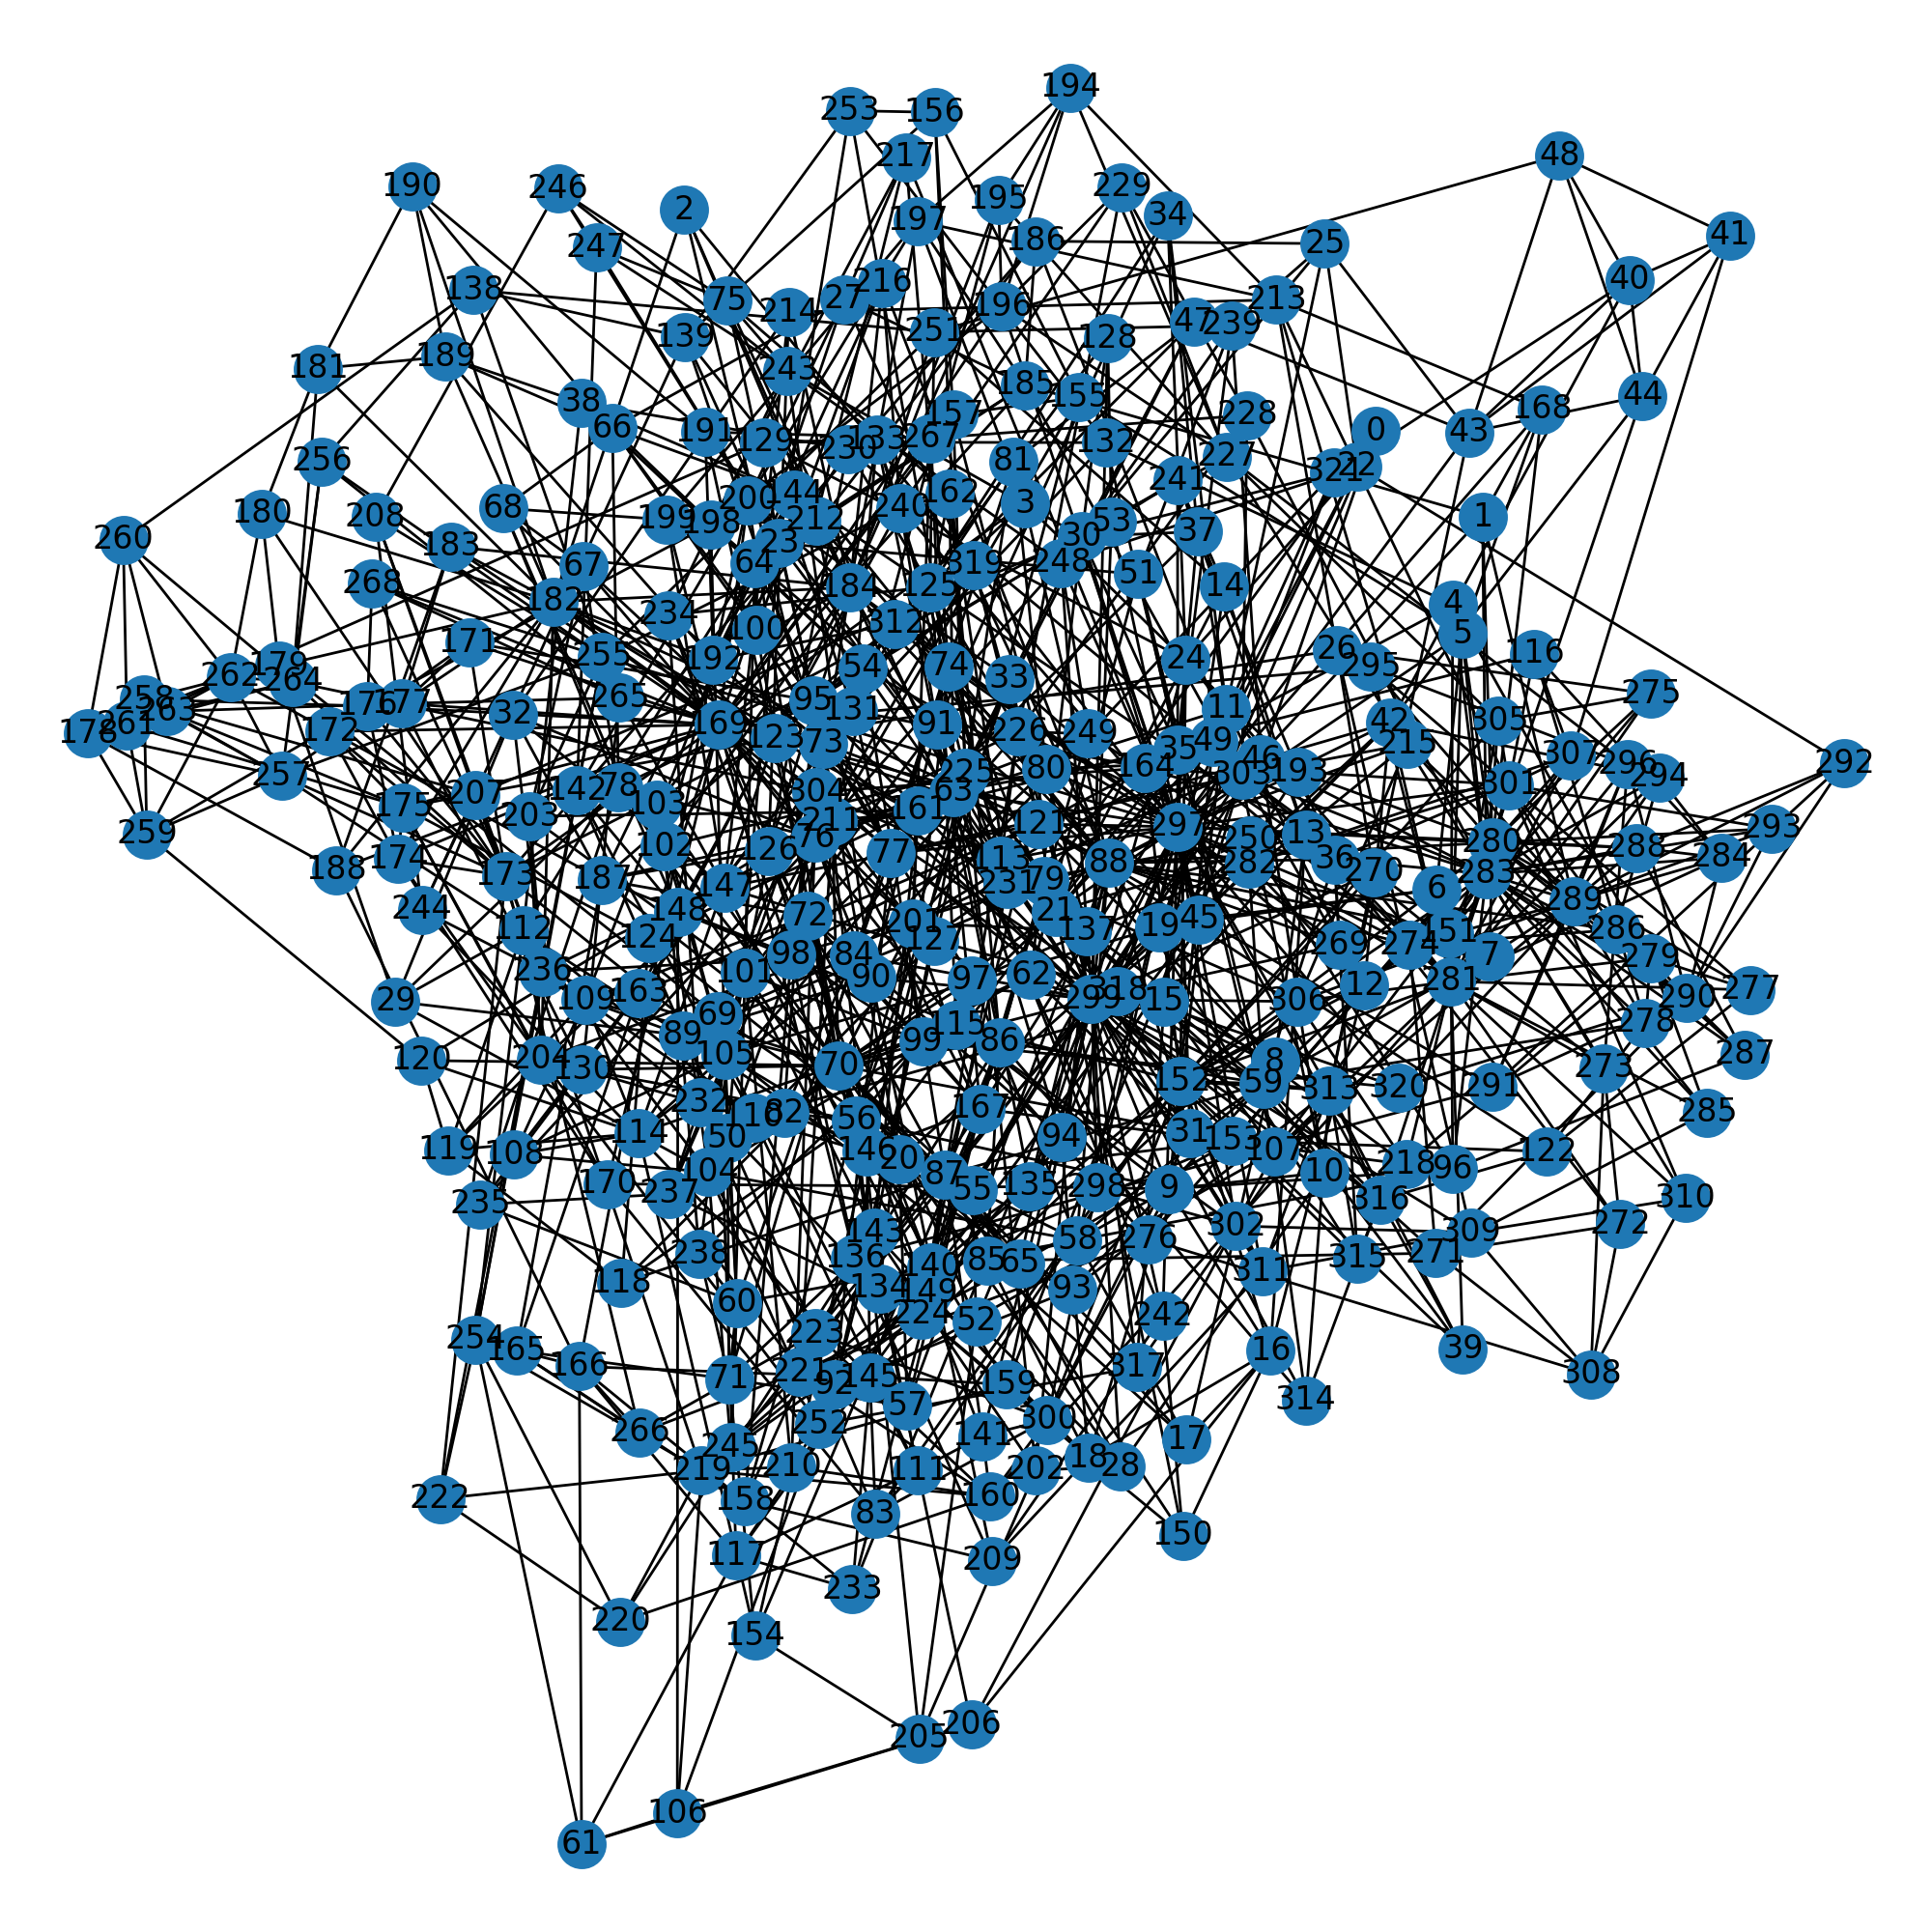

In [47]:
show_G(a_zwickau_G)

<IPython.core.display.Javascript object>


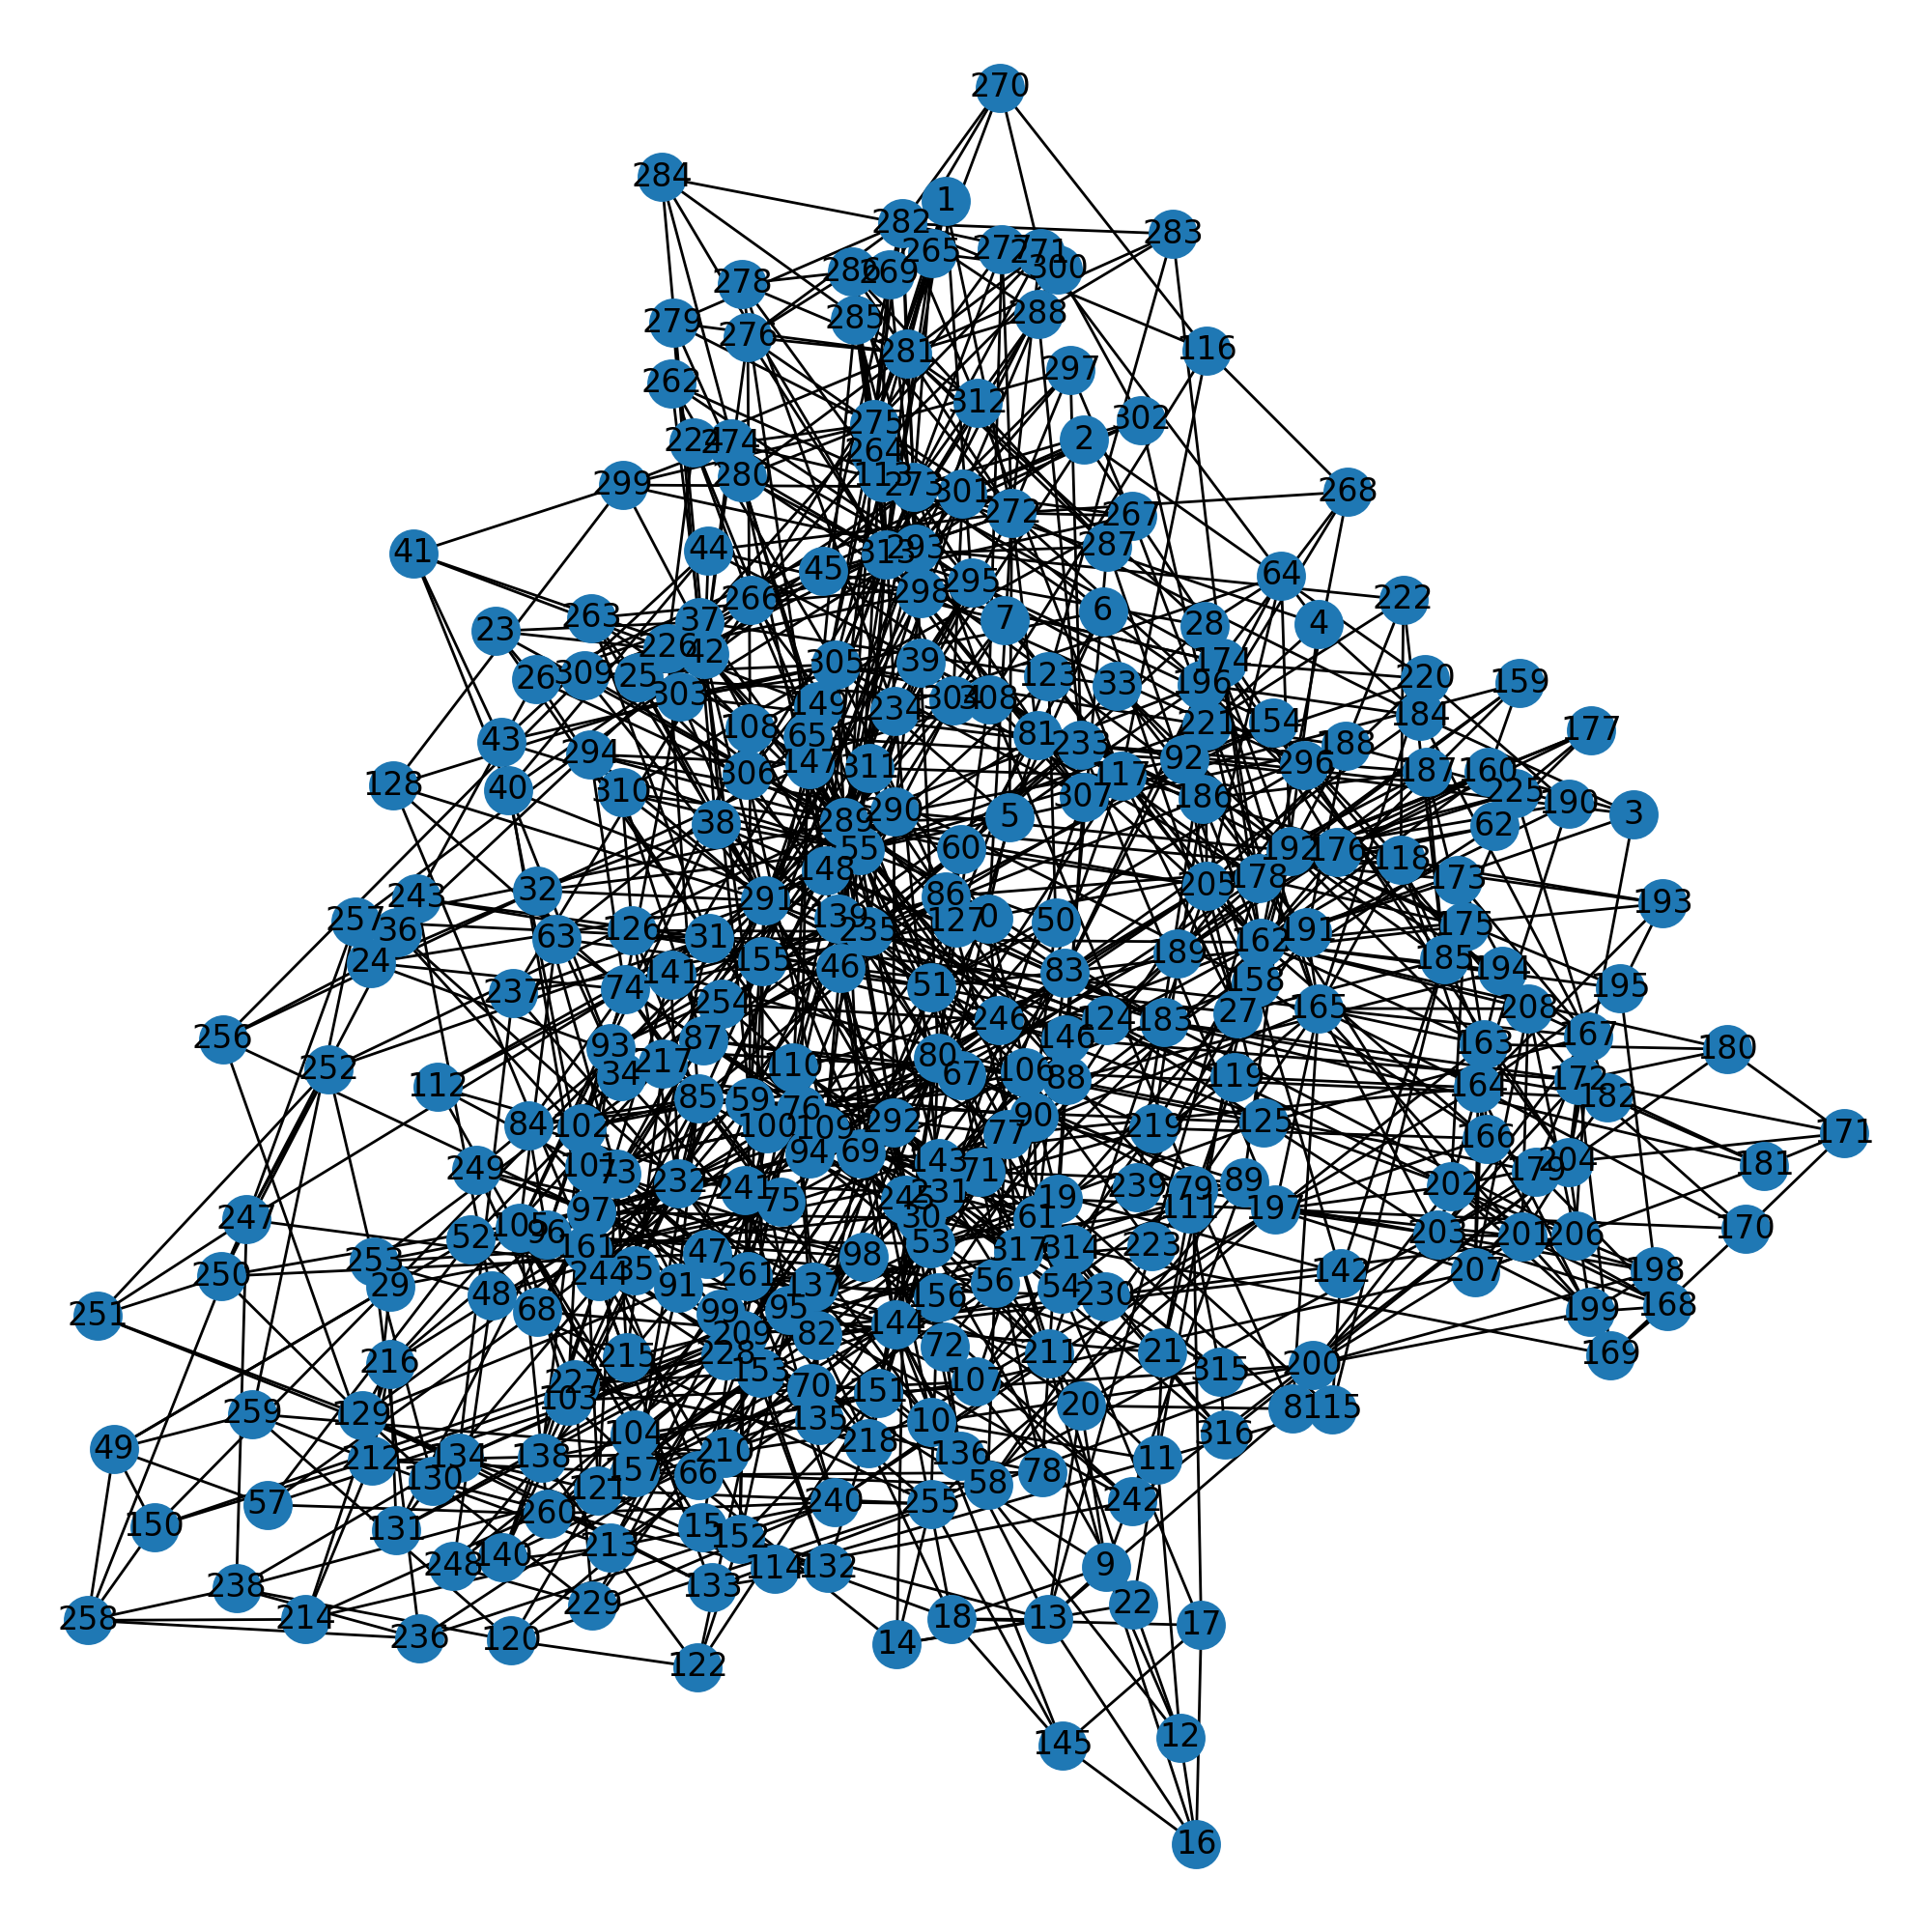

In [48]:
show_G(b_london_G)